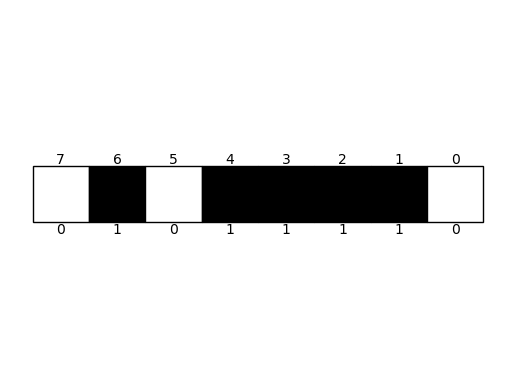

In [245]:
import numpy as np
import matplotlib.pyplot as plt

def draw_binary(bs):
    fig, ax = plt.subplots()

    for i, b in enumerate(bs):
        color = 'w' if b == '0' else 'k'
        square = plt.Rectangle((i, 0), 1, 1, fill=True, facecolor=color, edgecolor='k')
        ax.add_patch(square)
        ax.text(i+0.5, 0, b, horizontalalignment='center', verticalalignment='top', color='k')
        ax.text(len(bs) - i-0.5, 1,str(i) , horizontalalignment='center', verticalalignment='bottom', color='k')

    plt.axis('equal')
    plt.axis('off')
    plt.show()


def binary(num, width=8):
    return np.binary_repr(num, width=width)

draw_binary('01011110')

## 数据类型

### 整型数据 `int`, `np.int32`, `np.int64`

In [80]:
a = 7

In [81]:
binary(a)

'00000111'

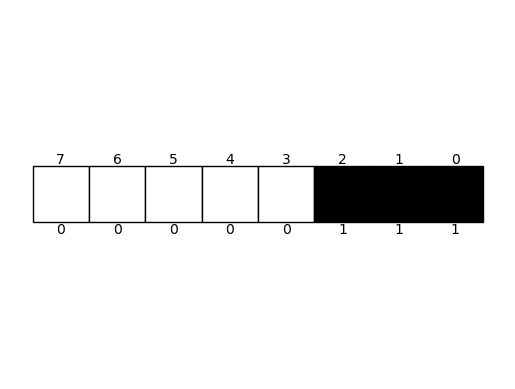

In [82]:
draw_binary(binary(a))

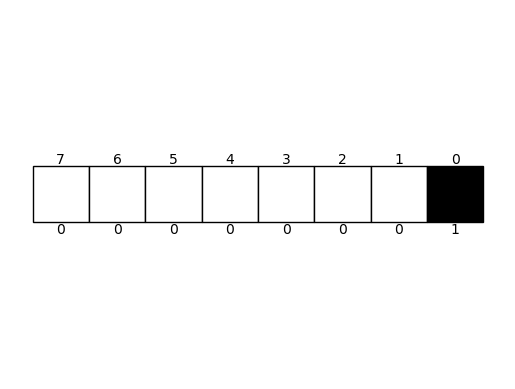

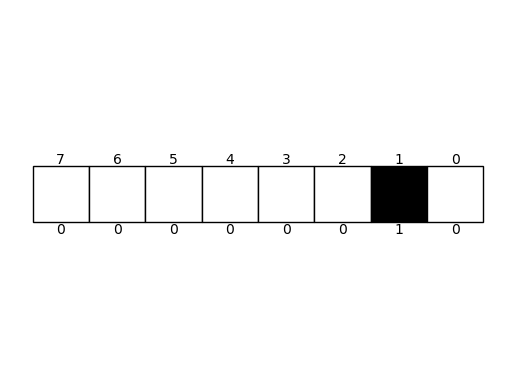

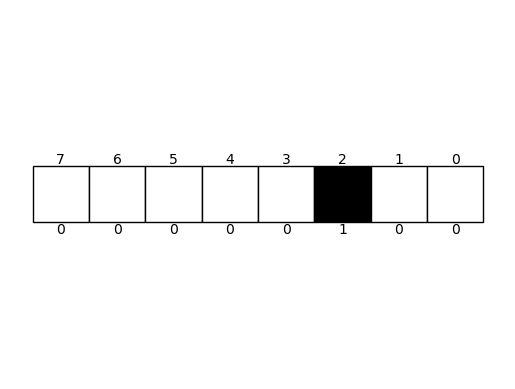

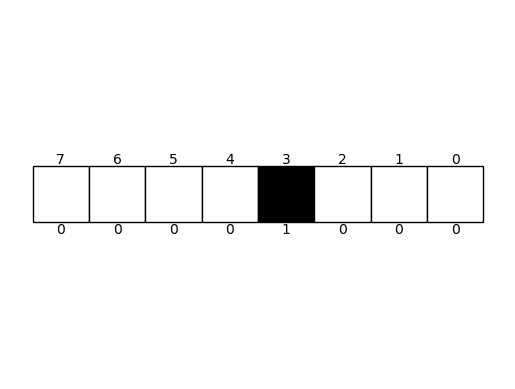

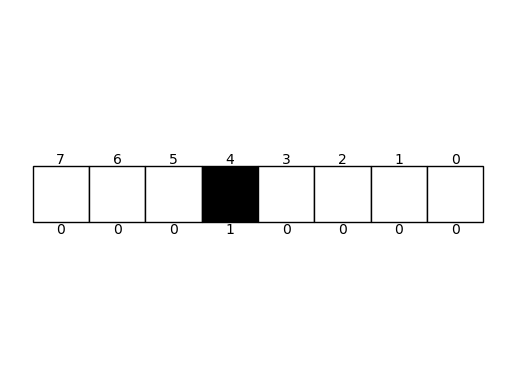

In [83]:
for i in range(5):
    draw_binary(binary(1<<i))

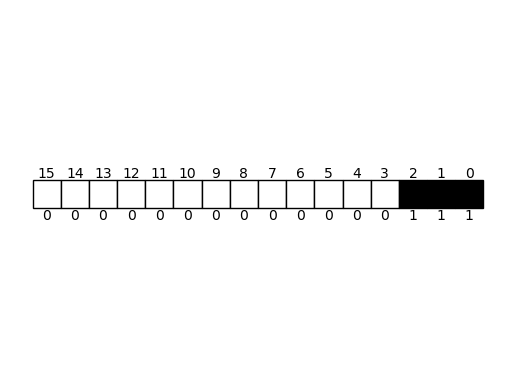

In [84]:
draw_binary(binary(a, 16))

In [88]:
(1<<7)-1

127

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZZe461O6VuJqOWZs_jkv0iLVxh-MukMChAg&s)


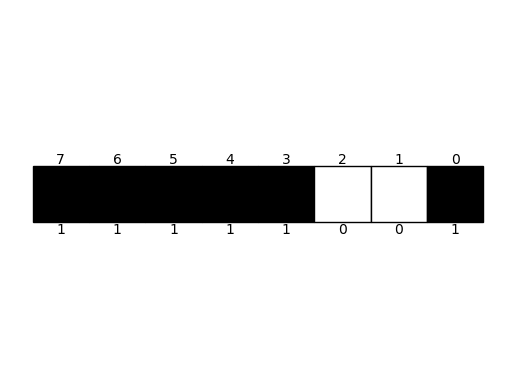

In [96]:
draw_binary(binary(-a))

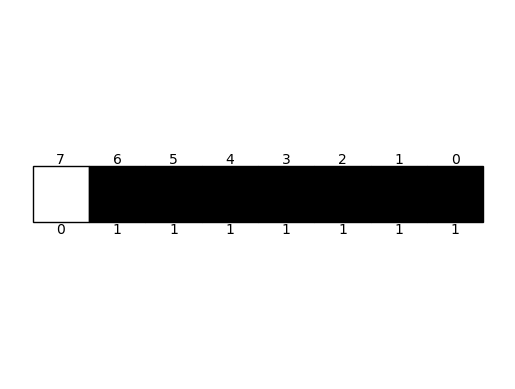

In [94]:
# 首位表示负数
draw_binary(binary((1<<7)-1))


In [67]:
(1<<31)-1

2147483647

In [57]:
1<<63-1

4611686018427387904

In [78]:
np.array([(1<<63-1)], dtype=np.int64)

array([4611686018427387904], dtype=int64)

### 浮点型数据 `float`, `np.float32`, `np.float64`
- `float` → `np.float64` 双精度浮点数据，对应 Java/C 的 `double`

In [97]:
a = np.array([3.14], dtype=float)
a.dtype

dtype('float64')

![](../imgs/float.jpeg)

In [101]:
num = 3.14
x = np.float32(num)
binary_32 = np.binary_repr(x.view(np.uint32), width=32)
print("float32二进制表示:", binary_32)

y = np.float64(num)
binary_64 = np.binary_repr(y.view(np.uint64), width=64)
print("float64二进制表示:", binary_64)

float32二进制表示: 01000000010010001111010111000011
float64二进制表示: 0100000000001001000111101011100001010001111010111000010100011111


In [102]:
num = 3.140000000000001
x = np.float32(num)
binary_32 = np.binary_repr(x.view(np.uint32), width=32)
print("float32二进制表示:", binary_32)

y = np.float64(num)
binary_64 = np.binary_repr(y.view(np.uint64), width=64)
print("float64二进制表示:", binary_64)

float32二进制表示: 01000000010010001111010111000011
float64二进制表示: 0100000000001001000111101011100001010001111010111000010100100001


In [106]:
def view_32(x):
    x = np.float32(x)
    return np.binary_repr(x.view(np.uint32), width=32)

def view_64(x):
    x = np.float64(x)
    return np.binary_repr(x.view(np.uint64), width=64)

In [113]:
eps = 0.0001
num = 3.14
for i in range(10):
    if view_32(num) == view_32(num+eps):
        print(f"float32: {eps:.20f}")
    eps /= 10

for i in range(10):
    if view_64(num) == view_64(num+eps):
        print(f"float64: {eps:.20f}")

    eps /= 10


float32: 0.00000010000000000000
float32: 0.00000001000000000000
float32: 0.00000000100000000000
float32: 0.00000000010000000000
float32: 0.00000000001000000000
float32: 0.00000000000100000000
float32: 0.00000000000010000000
float64: 0.00000000000000010000
float64: 0.00000000000000001000
float64: 0.00000000000000000100
float64: 0.00000000000000000010
float64: 0.00000000000000000001
float64: 0.00000000000000000000
float64: 0.00000000000000000000
float64: 0.00000000000000000000


## 算法复杂度
### 时间复杂度 Time Complexity
- O(1) 常数时间
- O(log n) 对数时间
- O(n) 线性时间
- O(n log n) 线性对数时间
- O(n^2) 平方时间
- O(n^3) 立方时间
- O(2^n) 指数时间 - 摩尔定律 Moore's Law - 硅片上的原子数目，每 18 个月翻一倍

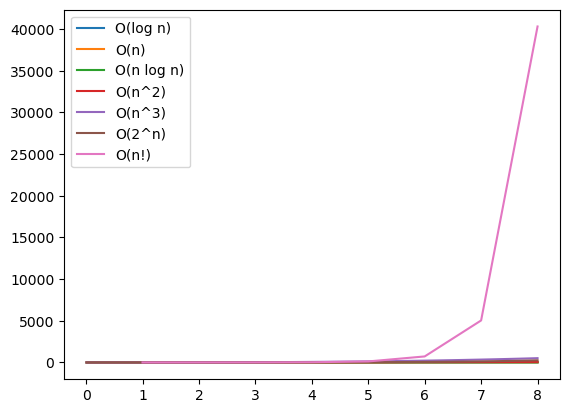

In [236]:
import math
max_x = 8  # 15
x = np.linspace(0.01, max_x, 100) # 0.01 to 10, 100 points
x_int = np.arange(1, max_x+1)

plt.plot(x, np.log(x), label='O(log n)')
plt.plot(x, x, label='O(n)')
plt.plot(x, x * np.log(x), label='O(n log n)') # ************
plt.plot(x, x**2, label='O(n^2)')
plt.plot(x, x**3, label='O(n^3)')
plt.plot(x, 2**x, label='O(2^n)')
plt.plot(x_int, [math.factorial(x) for x in x_int], label='O(n!)') # NP hard
plt.legend()
plt.show()

In [213]:
import time

In [225]:
n = 100

In [226]:
# algorithm of O(1) - Gauss sum
tot = (1+n)*n//2
tot

5050

In [227]:
# algorithm of O(n)
cur = time.time()
tot = 0
for i in range(n+1):
    tot += i
duration = time.time() - cur
tot

5050

In [205]:
# algorithm of O(n^2)
tot = 0
for i in range(n+1):
    for j in range(n+1):
        if i == j:
            tot += i
tot

KeyboardInterrupt: 

In [223]:
duration*n/60/60 # hours for O(n^2)

18.750429153442383

In [224]:
duration*n*n/60/60/24/365 # years for O(n^3)

2140.459949023103

## 二分搜索 Binary Search

在单调的情形下，可以使用二分搜索来查找某个值的位置。


In [169]:
l, r = 0, 10000000

def check(num):
    return num < 1000

while l < r:
    m = (l + r) // 2
    print(m, l, r)
    if check(m):
        l = m + 1
    else:
        r = m

5000000 0 10000000
2500000 0 5000000
1250000 0 2500000
625000 0 1250000
312500 0 625000
156250 0 312500
78125 0 156250
39062 0 78125
19531 0 39062
9765 0 19531
4882 0 9765
2441 0 4882
1220 0 2441
610 0 1220
915 611 1220
1068 916 1220
992 916 1068
1030 993 1068
1011 993 1030
1002 993 1011
997 993 1002
1000 998 1002
999 998 1000


使用二分搜索切分多边形

In [161]:
from shapely import Polygon, LineString, GeometryCollection
from shapely.ops import split
eps = 0.0001

def random_polygon(n, min_R, max_r):
    angle_step = 2 * np.pi / n
    pts = []
    for i in range(n):
        r = np.random.uniform(min_R, max_r)
        angle = i * angle_step
        x, y = r * np.cos(angle), r * np.sin(angle)
        pts.append([x, y])
    return pts

def split_polygon(ply, x):
    bottom, top = ply.bounds[1]-eps, ply.bounds[3]+eps
    ls = LineString([(x, bottom), (x, top)])
    left, right = split(ply, ls).geoms
    return left, right



In [171]:
# check if x need to move larger
def check(ply, x):
    if x < ply.bounds[0]:
        return True
    if x > ply.bounds[2]:
        return False
    left, right = split_polygon(ply, x)
    if left.area > right.area:
        return True


Optimization done within 19 steps
213.60760484408925 213.60823317862747
CPU times: total: 0 ns
Wall time: 5 ms


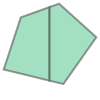

In [237]:
%%time
ply = Polygon(random_polygon(5, 10, 20))
l, r = ply.bounds[0], ply.bounds[2]
cnt = 0
while l + eps < r:
    m = (l + r) / 2
    cnt += 1
    if check(ply, m):
        l = m
    else:
        r = m

print(f'Optimization done within {cnt} steps')
left, right = split_polygon(ply, r)
print(left.area, right.area)
GeometryCollection([left, right])

## 时间复杂度与编程语言
高级编程语言中，C++是执行速度最快的语言。一般来说，Python 比 C++ 慢 10 倍以上，Java 比 C++ 慢大约 2-3 倍。
![](https://niklas-heer.github.io/speed-comparison/assets/latest/combined_results.png)
https://niklas-heer.github.io/speed-comparison/

In [242]:
arr = [i for i in range(10000000)]
arr_np = np.array(arr)

In [243]:
%%time
[x+1 for x in arr];

CPU times: total: 328 ms
Wall time: 338 ms


In [244]:
%%time
arr_np+=1

CPU times: total: 0 ns
Wall time: 3 ms
